# Simulation Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import viz # curriculum example visualizations

np.random.seed(29)

Using the repo setup directions, setup a new local and remote repository named `statistics-exercises`. The local version of your repo should live inside of `~/codeup-data-science`. This repo should be named `statistics-exercises`.

Do your work for this exercise in either a python file named `simulation.py` or a jupyter notebook named `simulation.ipynb`.

In [8]:
#Set 100_000 as a number of trials for all exercises 
n_trials= 10 ** 5

1. How likely is it that you roll doubles when rolling two dice? 

In [4]:
n_dice = 2

rolls = np.random.choice([1, 2, 3, 4, 5, 6], size = (n_trials, n_dice))
rolls

array([[6, 4],
       [5, 6],
       [3, 1],
       ...,
       [5, 6],
       [5, 5],
       [6, 5]])

In [5]:
rolls[0, :1]

array([6])

In [6]:
doubles_count = 0
for i in range(n_trials):
    if rolls[i, :1] == rolls[i, 1:]:
        doubles_count += 1
doubles_count

16645

In [9]:
doubles_probability = doubles_count / n_trials
doubles_probability

0.16645

In [10]:
#class solution
(rolls[:, 0] == rolls[:, 1]).mean()

0.16645

In [11]:
# class solution #2
rolls1 = np.random.choice([1, 2, 3, 4, 5, 6], size = (n_trials, 1))
rolls2 = np.random.choice([1, 2, 3, 4, 5, 6], size = (n_trials, 1))

In [12]:
(rolls1 == rolls2).mean()

0.16492

2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [13]:
# 'Head', 'Tail'
n_coins = 8
#True for Heads, False for Tails
coins_flips = np.random.choice([True, False], size = (n_trials, n_coins))
coins_flips

array([[False, False,  True, ..., False,  True,  True],
       [ True,  True, False, ...,  True, False, False],
       [ True,  True,  True, ..., False,  True,  True],
       ...,
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False]])

In [14]:
#create an array that sums all True (Heads)
heads_count = coins_flips.sum(axis=1)

In [15]:
heads_3 = 0
for c in heads_count:
    if c == 3:
        heads_3 += 1
heads_3

21707

In [16]:
heads_probability = heads_3 / n_trials
display(heads_probability)

0.21707

In [17]:
# fancy class solution
(coins_flips.sum(axis=1) == 3).mean()

0.21707

In [20]:
#more than 3 heads
(coins_flips.sum(axis=1) > 3).mean()

0.63866

3. There are approximately 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [46]:
n_billboards = 2
students = np.random.choice(['DS', 'web1', 'web2', 'web3'], size = (n_trials, n_billboards))
students = pd.DataFrame(students, columns = ['first', 'second'])
#students

In [80]:
students['DS'] = (students['first'] == 'DS') & (students['second'] == 'DS')
display(students)
students.DS.sum()

,first,second,DS
0,DS,web3,False
1,web3,web3,False
2,web2,web2,False
3,web3,web2,False
4,DS,web3,False
...,...,...,...
99995,web3,web2,False
99996,DS,DS,True
99997,web1,web2,False
99998,web2,web1,False


6201

In [68]:
# solution with numpy array
students1 = np.random.choice(['DS', 'web1', 'web2', 'web3'], size = (n_trials, n_billboards))
s_count = 0
for s in students1:
    if s[0] == 'DS' and s[1] == 'DS':
        s_count += 1
s_count / n_trials

0.06213

In [26]:
#class solution
#0 for web, 1 for DS
bb = np.random.choice([0,1], size = (n_trials, 2), p = [0.75, 0.25])
bb

array([[0, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

Converting probability to odds

In [22]:
p = (bb.sum(axis = 1) == 2).mean()

In [23]:
p

0.06264

In [24]:
odds = p / (1 - p)
odds

0.06682597934624904

In [25]:
1 / odds

14.964240102171138

In [28]:
1 / 15

0.06666666666666667

In [29]:
#theoretical probability
0.25 * 0.25

0.0625

*1 out of 14 odds to see 2 DS students on 2 billboards*
1:14 odds (15 - 1), 15 - total, 1 - occuring, 14 not occuring

4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values.

In [30]:
stack = 17
mu = 3
sigma = 1.5
n_days = 5
#random buys for 5 days of week mon to fri
poptarts = np.random.normal(mu, sigma, size = (n_trials, n_days))
poptarts

array([[1.42562779, 2.5382793 , 4.87652088, 3.27685951, 2.16072286],
       [6.05369803, 1.42999482, 5.0119334 , 2.96921852, 2.04137034],
       [4.06569392, 1.6712648 , 4.5726005 , 2.57956497, 3.12702513],
       ...,
       [2.18867336, 2.76080939, 3.10630877, 5.58580606, 2.32024889],
       [2.58380034, 4.53552588, 1.64022623, 0.33504987, 2.53160538],
       [1.81188043, 3.02109112, 3.92599817, 2.76266344, 4.17395462]])

In [34]:
# check how many items bought per week
buys = poptarts.sum(axis = 1)
display(buys)
(buys <= 16).mean() # we can not use < 17 because the numbers in the array are floats

array([14.27801034, 17.50621511, 16.01614932, ..., 15.96184648,
       11.62620771, 15.69558778])

0.61641

Class solution

In [49]:
pop = np.random.normal(3, 1.5, size = (10000, 5))
(pop.sum(axis = 1) <= 16).mean()

0.612

Vizualizations to the class solution

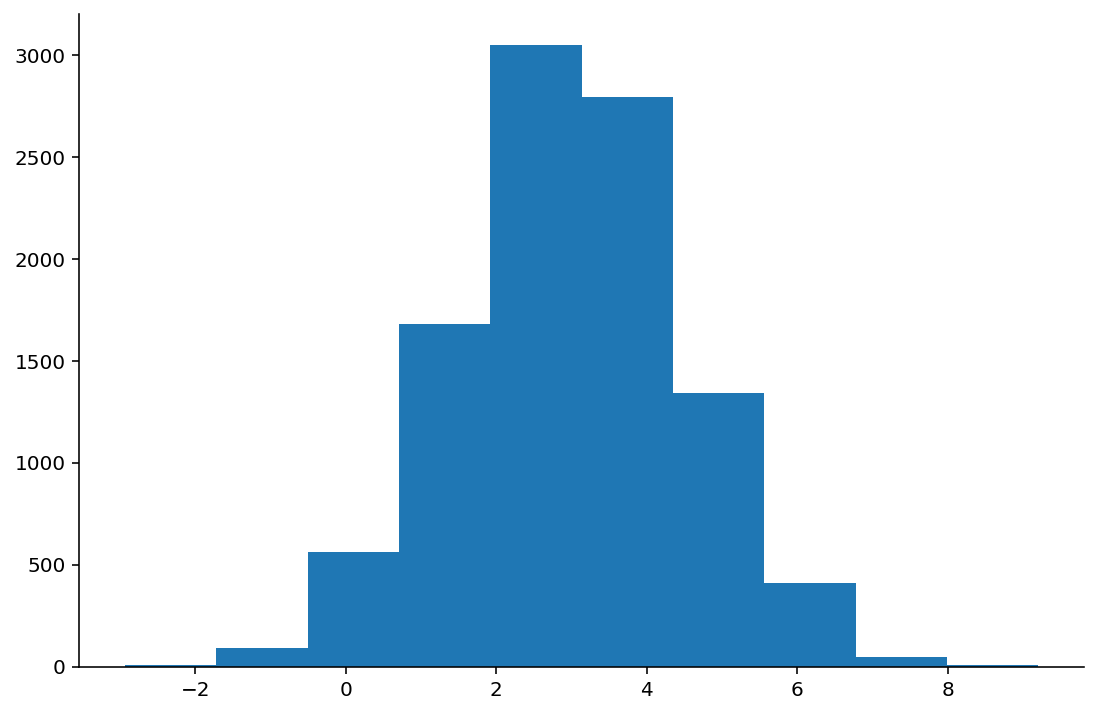

In [47]:
plt.hist(np.random.normal(3, 1.5, size = (10000)));

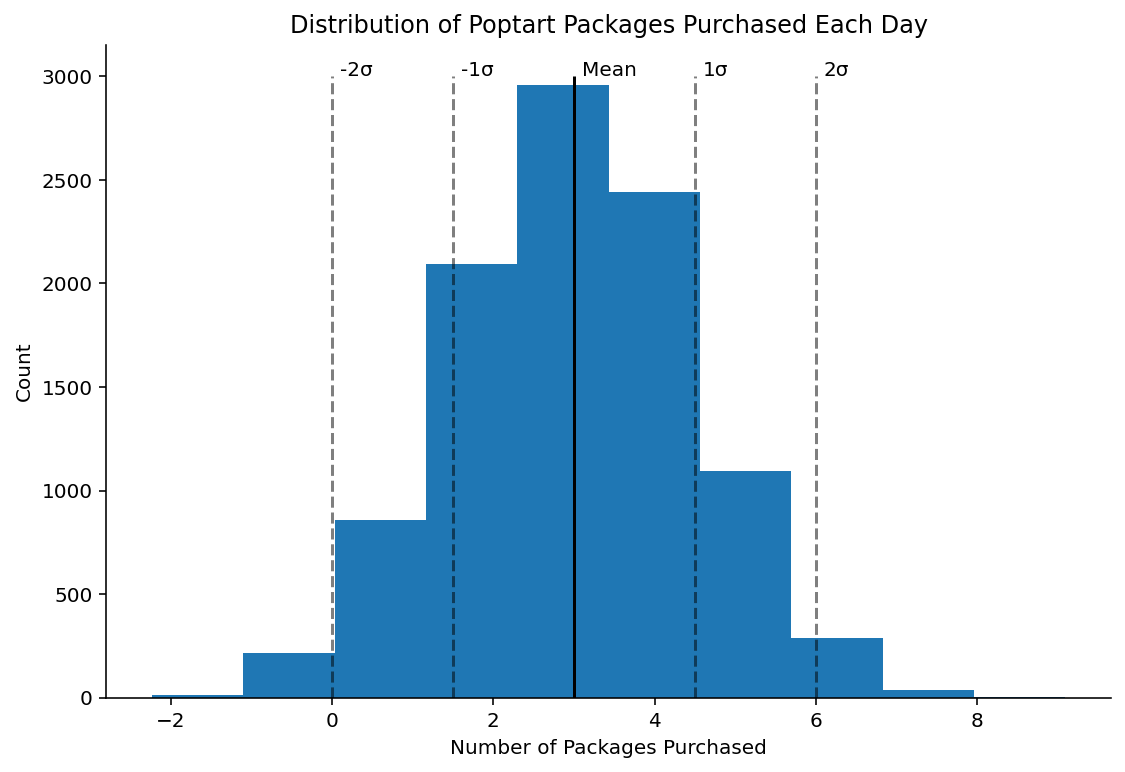

In [48]:
plt.hist(np.random.normal(3, 1.5, size = (10000)))
plt.title('Distribution of Poptart Packages Purchased Each Day')
plt.vlines(3, 0, 3000, color='black')
plt.text(3.1, 3000, 'Mean')
plt.vlines(4.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(4.6, 3000, '1σ')
plt.vlines(6.0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(6.1, 3000, '2σ')
plt.vlines(1.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(1.6, 3000, '-1σ')
plt.vlines(0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(0.1, 3000, '-2σ')
plt.ylabel('Count')
plt.xlabel('Number of Packages Purchased')
plt.show()

5. Compare Heights

- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- Since you have means and standard deviations, you can use `np.random.normal` to generate observations.
- If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [35]:
men = np.random.normal(178, 8, n_trials)
women = np.random.normal(170, 6, n_trials)
display(men)
display(women)

array([176.7345157 , 179.29223996, 169.82847675, ..., 190.42281691,
       179.24542084, 187.27165981])

array([165.63952255, 171.6873772 , 175.38550389, ..., 165.5735882 ,
       161.55421501, 170.53245752])

In [39]:
random_pairs = pd.DataFrame({'Men' : men, 'Women' : women})
random_pairs['Difference'] = (random_pairs.Men - random_pairs.Women) < 0
random_pairs.Difference.mean()

0.21232

In [40]:
random_pairs.Difference.sum() / n_trials

0.21232

In [41]:
# class solution
(men < women).mean()

0.21232

6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. 
- What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?
- What is the probability that we observe an installation issue within the first 150 students that download anaconda?
- How likely is it that 450 students all download anaconda without an issue?

In [41]:
def count_success_prob(number):
    '''
    Takes a number of installations as an argument
    Probability of success is 249/250
    Probability of failure is 1 / 250
    Creates n_trials (100_000) simulations
    Returns a probability of success, when all trials are True
    # True - no issues
    # False - there was a problem during the instalation 
    '''
    arr = np.random.choice([True, False], size = (n_trials, number), p = [249/250, 1/250])
    return (arr.sum(axis = 1) == number).mean()

In [42]:
def count_fail_prob(number):
    '''
    probability of failure = 1 - probability of success
    '''
    return 1 - count_success_prob1(number)

In [44]:
#What are the odds that after having 50 students download anaconda, no one has an installation issue?
count_success_prob(50)

0.81817

In [45]:
# 100?
count_success_prob1(100)

0.67085

In [46]:
count_fail_prob(150)

0.44753

In [47]:
# How likely is it that 450 students all download anaconda without an issue?
count_success_prob(450)

0.16685

In [40]:
count_success_prob1(450)

0.16458

7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. 
- However, you haven't seen a food truck there in 3 days. How unlikely is this?
- How likely is it that a food truck will show up sometime this week?

In [54]:
# You haven't seen a food truck there in 3 days. How unlikely is this?
food_truck = np.random.choice([True, False], size = (n_trials, 3), p = [0.7, 0.3])
(food_truck.sum(axis = 1) == 0).mean()

0.02621

In [57]:
# How likely is it that a food truck will show up sometime this week?
food_truck1 = np.random.choice([True, False], size = (n_trials, 7), p = [0.7, 0.3])
(food_truck1.sum(axis = 1) >= 1).mean()

0.99974

8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40 people?

In [59]:
days_in_year = range(1, 366)
len(days_in_year)

365

In [71]:
def same_birthday_prob(number_of_people):
    days_in_year = range(1, 366)
    df = pd.DataFrame(np.random.choice(days_in_year, size=(n_trials, number_of_people)))
    return (df.nunique(axis = 1) < number_of_people).mean()                        

In [72]:
same_birthday_prob(23)

0.50596

In [97]:
same_birthday_prob(20)

0.4109

In [98]:
same_birthday_prob(40)

0.89221

In [43]:
def same_birthday_prob1(number_of_people):
    days_in_year = range(1, 366)
    arr = np.random.choice(days_in_year, size=(n_trials, number_of_people))
    count = 0
    for trial in arr:
        if len(np.unique(trial)) < number_of_people:
            count += 1
    return count / n_trials

In [94]:
same_birthday_prob1(23)

0.50716

In [95]:
same_birthday_prob1(20)

0.41146

In [96]:
same_birthday_prob1(40)

0.89212

In [44]:
same_birthday_prob1(60)

0.99351

In [45]:
same_birthday_prob1(70)

0.99926